In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Algerian_forest_cleaned_data.csv')

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [82]:
df.iloc[126]

Temperature    32.0
RH             60.0
Ws             14.0
Rain            0.2
FFMC           77.1
DMC             6.0
DC             17.6
ISI             1.8
FWI             0.9
Classes         0.0
Region          1.0
Name: 126, dtype: float64

In [4]:
X=df.drop('FWI',axis=1)
y=df.loc[:,'FWI']

In [5]:
print(X.shape,y.shape)

(243, 11) (243,)


In [6]:
X.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


<Axes: >

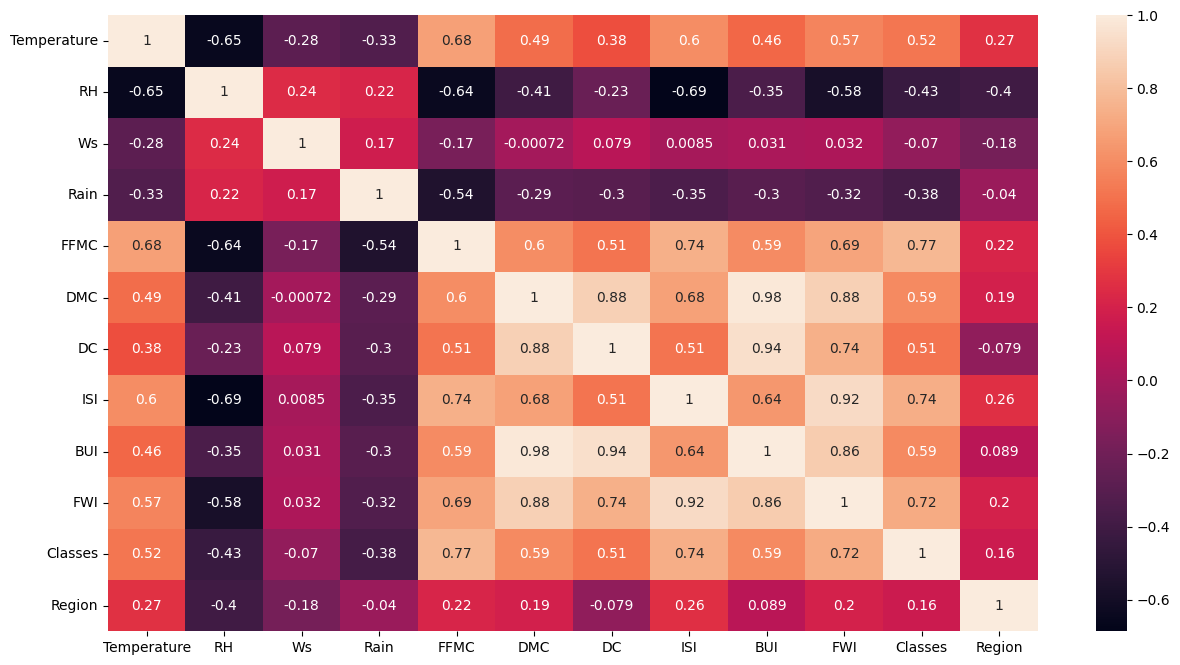

In [7]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True)

In [8]:
print(df.corr().columns)
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
def correlation(data, threshold):
  mp=set()
  arr=data.corr()
  for i in range(len(data.columns)):
    for j in range(i):
      if abs(arr.iloc[i,j])>threshold:
        mp.add(arr.columns[i])
  return mp




In [17]:
X_corr=X.corr()

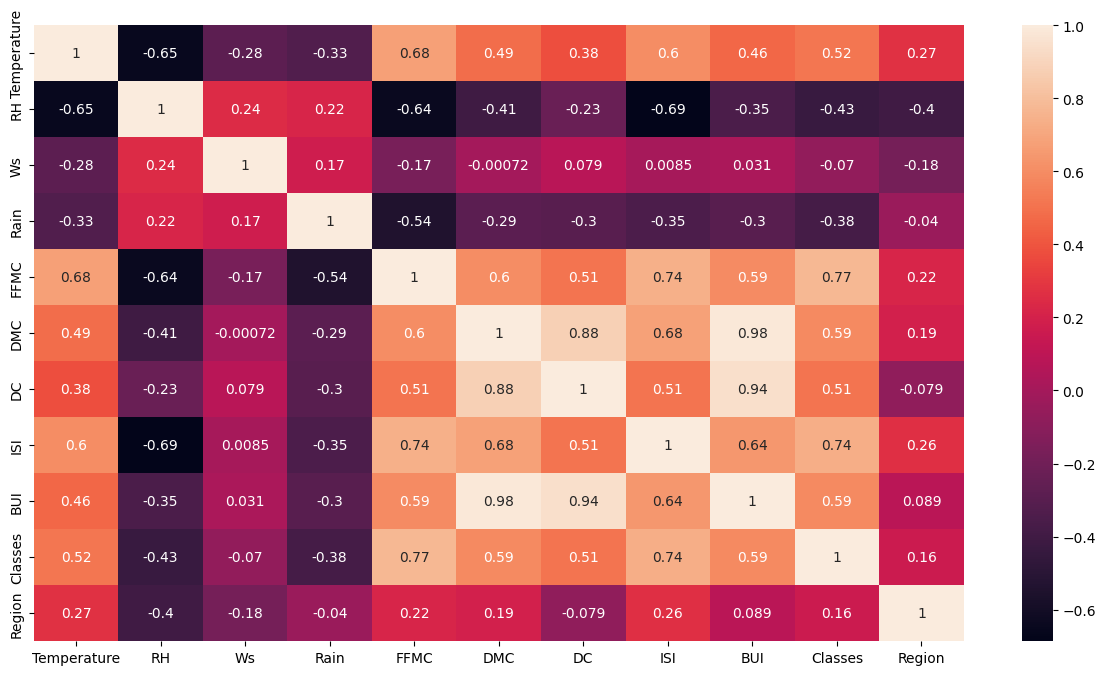

In [19]:
plt.figure(figsize=[15,8])
sns.heatmap(X_corr,annot=True)
plt.show()

In [10]:
features=correlation(X,.90)

In [11]:
print(features)

{'BUI'}


In [57]:
fea=list(features)
X.drop(fea,axis=1,inplace=True)

In [58]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,0,0


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [60]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
82,36,55,18,0.0,89.1,33.5,151.3,9.9,1,0
124,29,80,14,2.0,48.7,2.2,7.6,0.3,0,1
155,34,58,18,0.0,88.0,13.6,36.8,8.0,1,1
128,35,44,17,0.2,85.6,9.9,28.9,5.4,1,1
19,30,80,16,0.4,59.8,3.4,27.1,0.9,0,0
...,...,...,...,...,...,...,...,...,...,...
58,32,73,15,0.0,86.6,26.7,127.0,5.6,1,0
21,31,67,17,0.1,79.1,7.0,39.5,2.4,0,0
49,33,65,15,0.1,81.4,12.3,62.1,2.8,1,0
64,34,69,13,0.0,85.0,8.2,19.8,4.0,1,0


<Figure size 3000x2000 with 0 Axes>

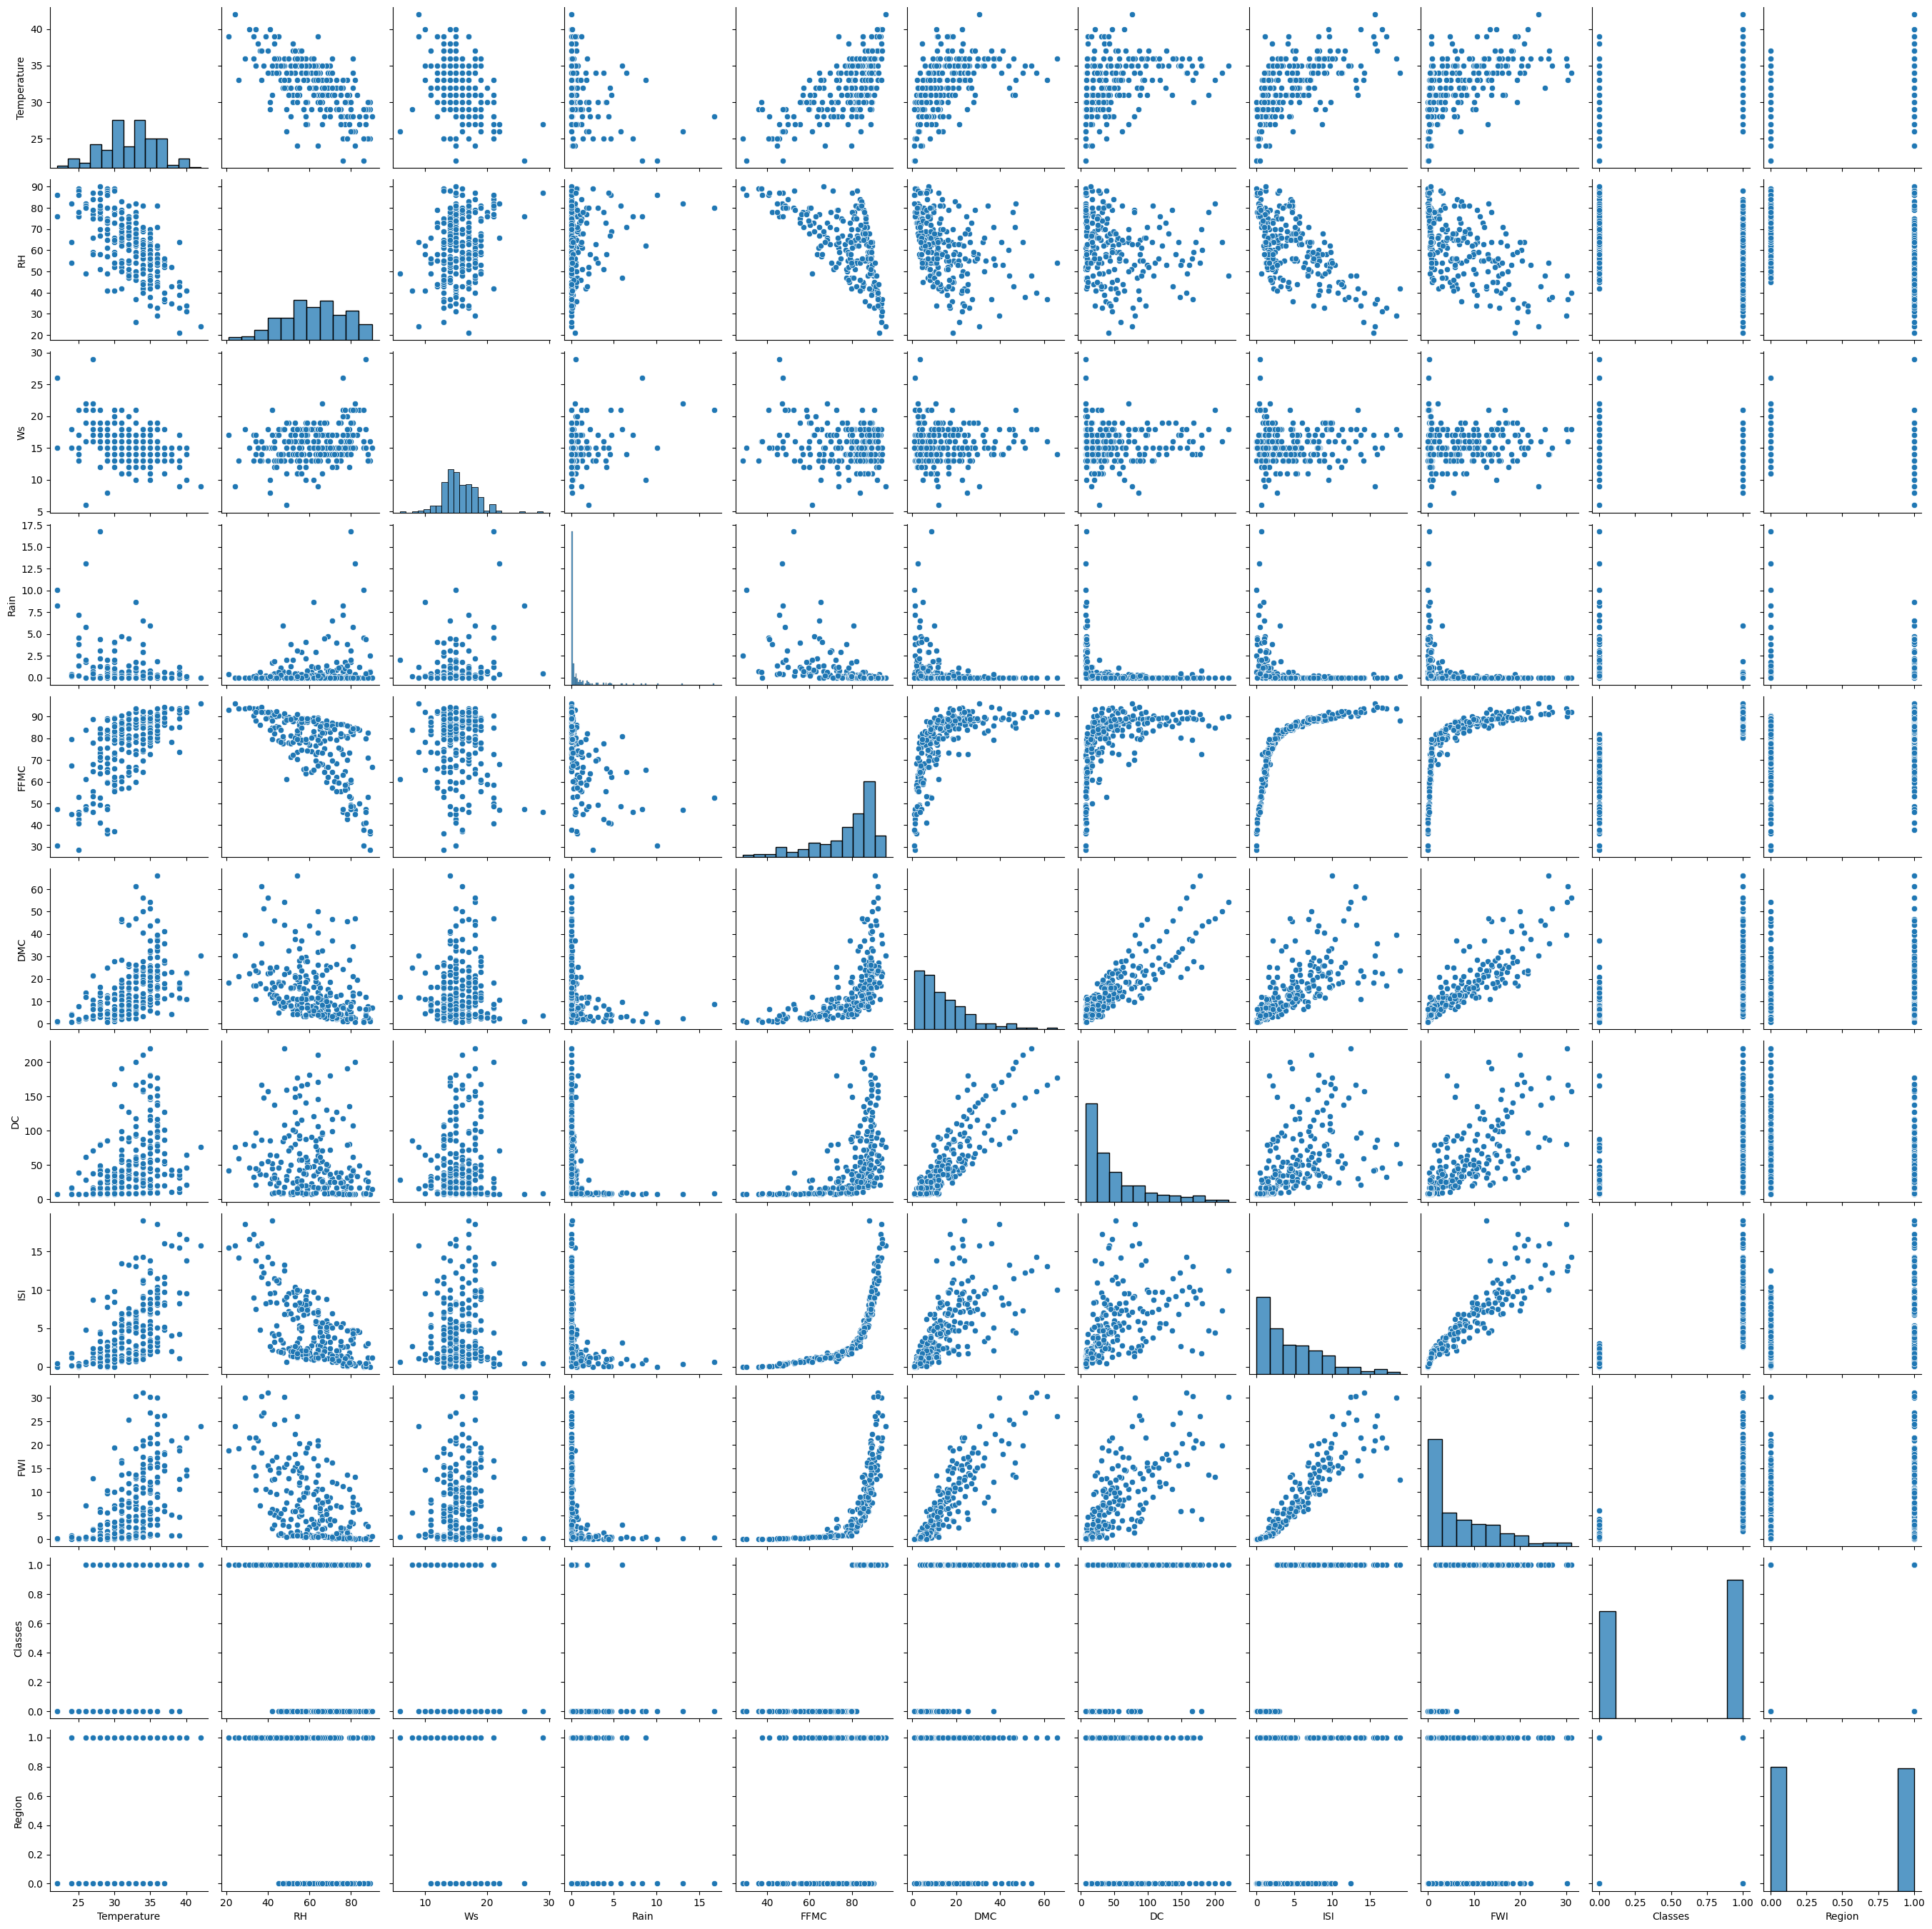

In [61]:
plt.figure(figsize=[30,20])
sns.pairplot(df)
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
X_train.shape

(182, 10)

In [64]:
print(f"{X_train_scaled.shape}, {X_test_scaled.shape}")

(182, 10), (61, 10)


# Linear Regression mode


In [65]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(X_train_scaled,y_train)
y_pred_linear=model_linear.predict(X_test_scaled)

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,y_pred_linear)
print(f"r2_score is : {score}")
print(f"mean_absolute_error is : {mean_absolute_error(y_test,y_pred_linear)}")
print(f"mean_squared_error is : {mean_squared_error(y_test,y_pred_linear)}")

r2_score is : 0.9828098826074738
mean_absolute_error is : 0.6392735163264146
mean_squared_error is : 0.9359950085844814


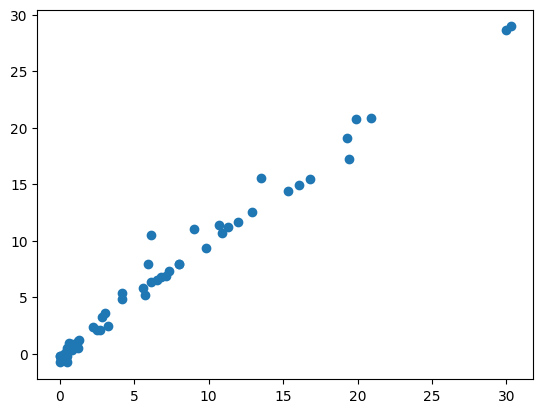

In [67]:
plt.scatter(y_test,y_pred_linear)

# Lasso Regression

In [68]:
from sklearn.linear_model import Lasso
model_lasso=Lasso()
model_lasso.fit(X_train_scaled,y_train)
y_pred_lasso=model_lasso.predict(X_test_scaled)

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error
print(f"r2_score is : {r2_score(y_test,y_pred_lasso)}")
print(f"mean absolute error is : {mean_absolute_error(y_test,y_pred_lasso)}")

r2_score is : 0.953386291907416
mean absolute error is : 1.1506487645520915


Lasso CV


In [70]:
from sklearn.linear_model import LassoCV
model_lasso_cv=LassoCV(cv=5)
model_lasso_cv.fit(X_train_scaled,y_train)
y_pred_lasso_cv=model_lasso_cv.predict(X_test_scaled)

In [71]:
y_test.shape,y_pred_lasso_cv.shape

((61,), (61,))

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error
print(f"r2 score is : {r2_score(y_test,y_pred_lasso_cv)}")
print(f"mean absolute error is : {mean_absolute_error(y_test,y_pred_lasso_cv)}")

r2 score is : 0.9826925492435594
mean absolute error is : 0.6298315059455469


# Ridge Regression Model

In [73]:
from sklearn.linear_model import Ridge
model_ridge=Ridge()
model_ridge.fit(X_train_scaled,y_train)
y_pred_ridge=model_ridge.predict(X_test_scaled)

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error
print(f"r2 score is {r2_score(y_test,y_pred_ridge)}")
print(f"mean absolute error is : {mean_absolute_error(y_test,y_pred_ridge)}")

r2 score is 0.9818901987120615
mean absolute error is : 0.6607215773163362


Ridge CV

In [75]:
from sklearn.linear_model import RidgeCV
model_ridge_cv=RidgeCV(cv=6)
model_ridge_cv.fit(X_train_scaled,y_train)
y_pred_ridge_cv=model_ridge_cv.predict(X_test_scaled)

In [76]:
from sklearn.metrics import r2_score,mean_absolute_error
print(f"r2 score is {r2_score(y_test,y_pred_ridge_cv)}")
print(f"mean absolute error is : {mean_absolute_error(y_test,y_pred_ridge_cv)}")

r2 score is 0.9713563734879513
mean absolute error is : 0.8709604956445536


# Pickling

In [77]:
import pickle
pickle.dump(model_lasso_cv,open('Lasso_cv.pkl','wb'))

In [78]:
pickle.dump(scaler,open('Standardization.pkl','wb'))

In [79]:
moldel_1=pickle.load(open('Lasso_cv.pkl','rb'))

In [80]:
y_1_pred=moldel_1.predict(X_test_scaled)

In [81]:
r2_score(y_test,y_1_pred)

0.9826925492435594